# Libraries and Data

In [22]:
# # Mount Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# # Path to the folder
# %cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting

In [65]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [25]:
# load dataset of stores and items
#https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset
#There are 7 unique stores and 10 unique products. The are no null values.
#data covering 10 years (2010-2019) 2019 is for test

df = pd.read_csv('train.csv')
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


# Time Series Index

In [26]:
# Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [27]:
# Select the Data for 9 November 2010
df.loc['2010-11-09']

,store,product,number_sold
Date,,,
2010-11-09,0,0,779
2010-11-09,0,1,792
2010-11-09,0,2,965
2010-11-09,0,3,878
2010-11-09,0,4,946
...,...,...,...
2010-11-09,6,5,914
2010-11-09,6,6,956
2010-11-09,6,7,869


## Notes ⚠️

there are 70 sold products from both stores

In [28]:
df.loc['2010-11-09']['store'].unique()

array([0, 1, 2, 3, 4, 5, 6])

## Notes ⚠️

during this day all stores sold items

In [29]:
df.loc['2010-11-09'][df.loc['2010-11-09']['store']==0][['product','number_sold']]

,product,number_sold
Date,,
2010-11-09,0,779
2010-11-09,1,792
2010-11-09,2,965
2010-11-09,3,878
2010-11-09,4,946
2010-11-09,5,902
2010-11-09,6,897
2010-11-09,7,945
2010-11-09,8,713


## Notes ⚠️

store "0" sold from all 10 products in this day '2010-11-09'

In [30]:
# Another way to load the data and set the column 'Date' as index
df1 = pd.read_csv("train.csv", index_col = "Date", parse_dates = True)
df1.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=230090, freq=None)

In [31]:
df1.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [32]:
# Resampling to Weekly Frequency and calculate the mean values of number_sold to the nearest int

weekly_data = df.resample('W')['number_sold'].mean().round().astype(int)
weekly_data

,number_sold
Date,
2010-01-03,784
2010-01-10,783
2010-01-17,783
2010-01-24,782
2010-01-31,782
...,...
2018-12-09,791
2018-12-16,791
2018-12-23,792


## Notes ⚠️

the below one doesn't suit this data as can't say sold 784.25 items

In [33]:
# Resampling to Weekly Frequency and calculate the mean values
#df.resample('W').mean()

Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Exploring Data

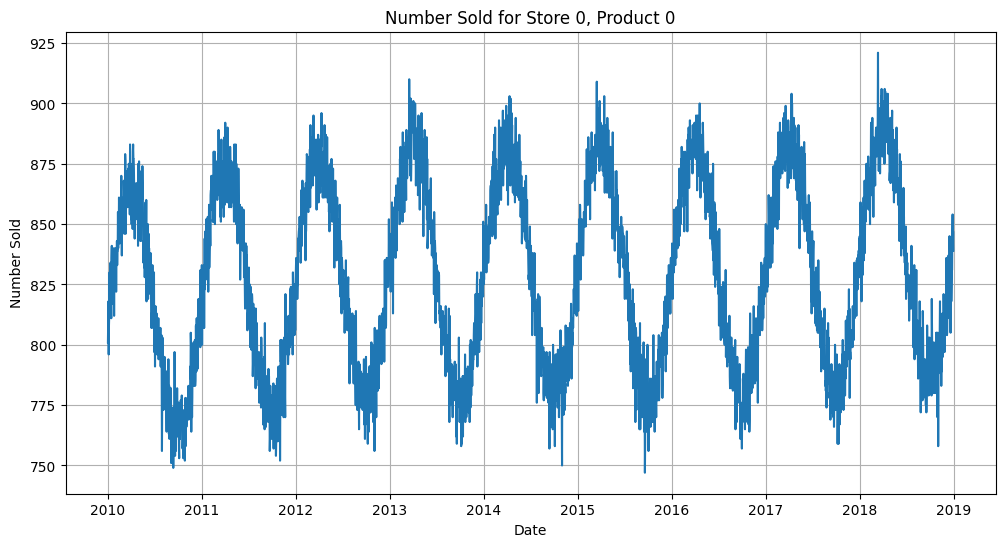

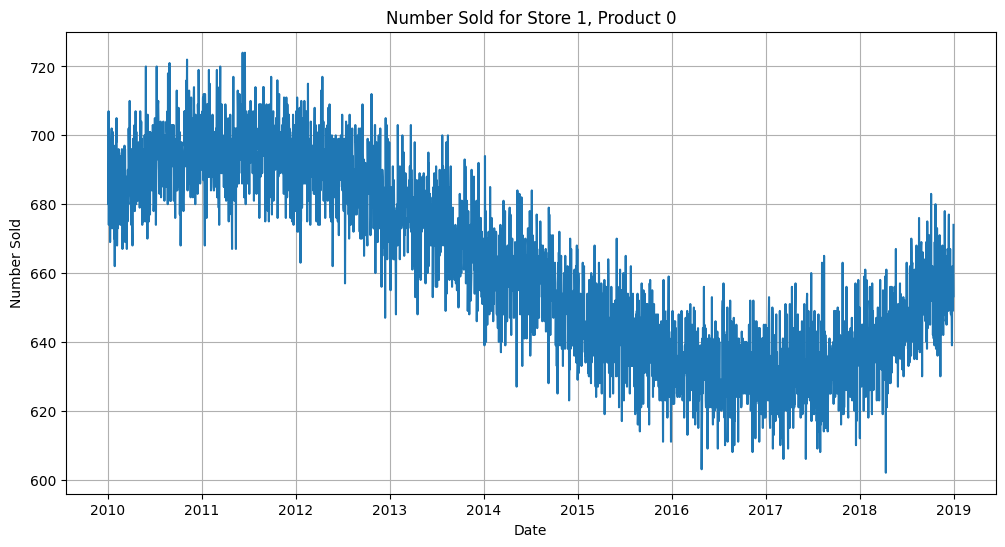

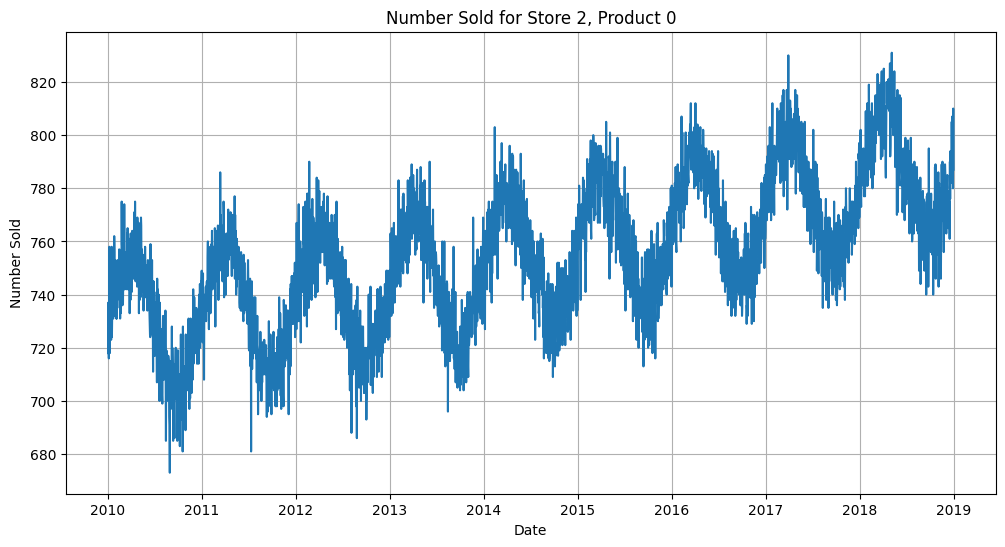

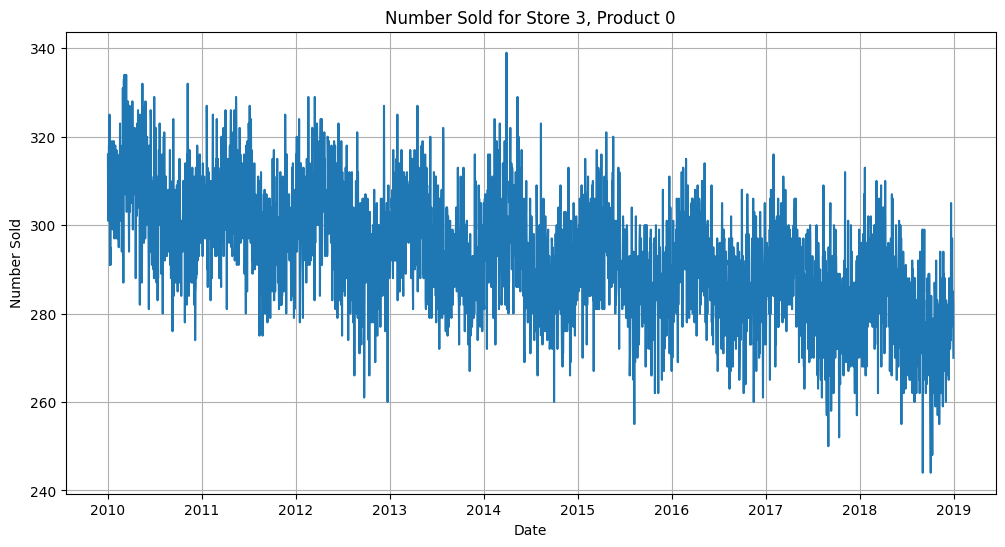

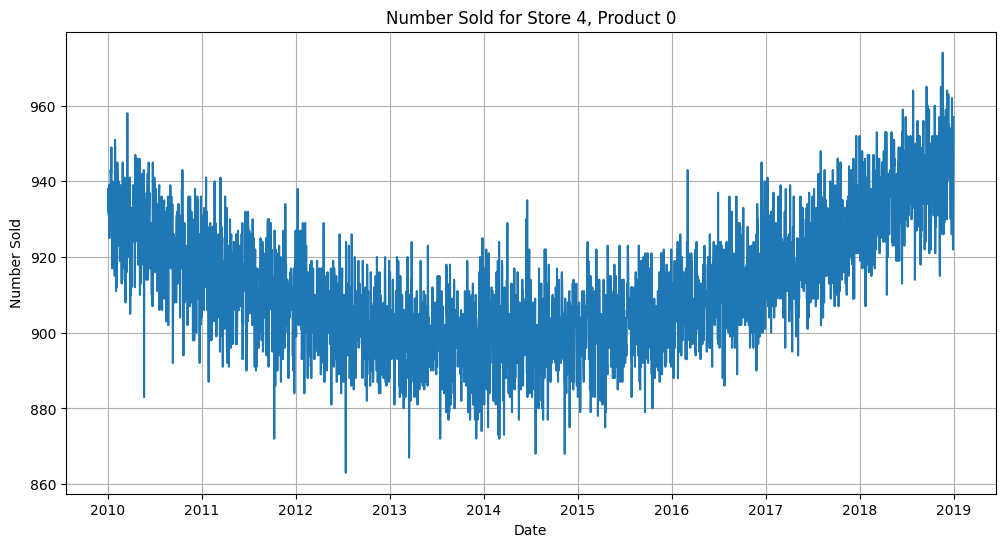

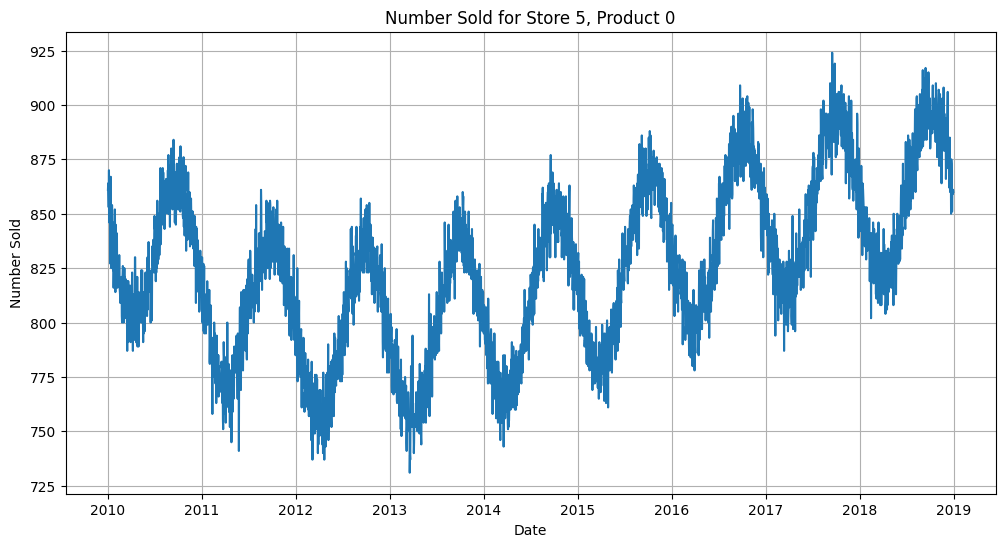

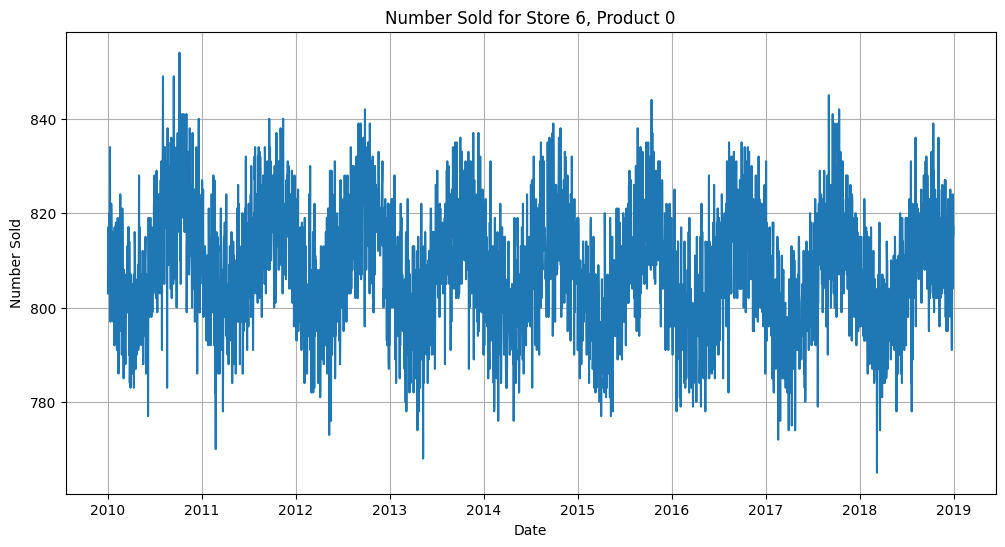

In [34]:
# Choose one store and one product
#store_id = 0
product_id = 0

for i in df['store'].unique():
  # Filter the dataframe for the chosen store and product
  store_product_data = df[(df['store'] == i) & (df['product'] == product_id)]

  # Plot the 'number_sold' over time
  plt.figure(figsize=(12, 6))
  plt.plot(store_product_data.index, store_product_data['number_sold'])
  plt.title(f'Number Sold for Store {i}, Product {product_id}')
  plt.xlabel('Date')
  plt.ylabel('Number Sold')
  plt.grid(True)
  plt.show()

## Notes ⚠️

This shows that the number of sold products:
 in store (3) is decreasing gradually
 in store (2) is increasing gradually


the below code is not applicable on number_sold as it doesn't contain unique values

In [35]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the number of sold items
#df['7_day_rolling']= df['number_sold'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
#df[['number_sold', '7_day_rolling']].loc['2010'].plot()
#plt.show()

In [36]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest number of sold products average
df.resample('Y').mean()['number_sold'].idxmax()

<ipython-input-36-17f297003348>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').mean()['number_sold'].idxmax()


Timestamp('2018-12-31 00:00:00')

In [37]:
# drop column 7_day_rolling as it's not beneficial

#df = df.drop('7_day_rolling', axis=1)

In [38]:
df.resample('M').mean()

<ipython-input-38-f6f2e5924c1f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,store,product,number_sold
Date,,,
2010-01-31,3.0,4.5,782.674194
2010-02-28,3.0,4.5,780.484694
2010-03-31,3.0,4.5,778.058986
2010-04-30,3.0,4.5,776.665714
2010-05-31,3.0,4.5,776.608295
...,...,...,...
2018-08-31,3.0,4.5,787.972811
2018-09-30,3.0,4.5,790.802381
2018-10-31,3.0,4.5,791.428571


In [39]:
# # Series.pct_change() - calculate the percentage change from the previous row
# # Create a new column for closing daily return (percentage change in the price from one day to the next)
# df['daily_returns'] = df['Close'].pct_change() * 100

In [40]:
# # Days with more than 10% change in closing price
# df[abs(df['daily_returns']) > 10].head()

# Data Visualization

In [41]:
df.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


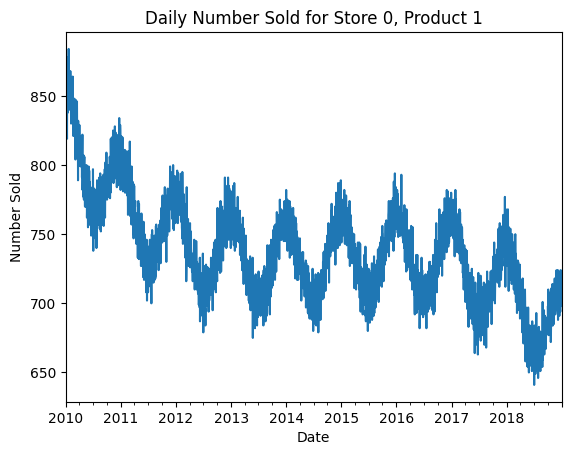

In [42]:
# Daily number of sold items in store 0 product 1
df_filtered = df[(df['store'] == 0) & (df['product'] == 1)]
df_filtered['number_sold'].plot(title=f'Daily Number Sold for Store 0, Product 1')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.show()

<ipython-input-43-91b8b929d77a>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['store'].plot()


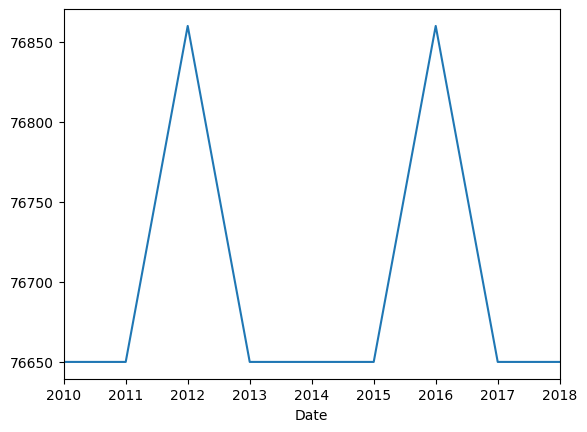

In [43]:
# Plot the Yearly sold count in store
df.resample('Y').sum()['store'].plot()
plt.show()

<ipython-input-44-7fa9f65c19ee>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['product'].plot()


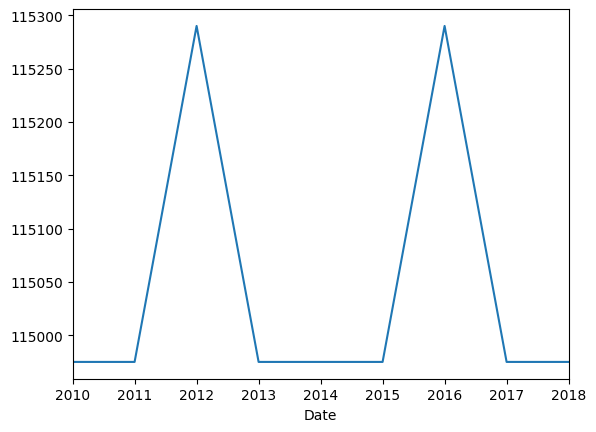

In [44]:
# Plot the Yearly sold count in product
df.resample('Y').sum()['product'].plot()
plt.show()

## Notes ⚠️

count of sold products has 2 peaks one in 2012 and the other in 2016

In [45]:
# # Create a new column for 30- Day rolling average of the volume
# df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# # Plotting Closing Price and 30-day rolling Volume
# df['30_day_rolling_vol'].plot(legend = True)
# ax = df['Close'].plot(secondary_y = True, legend = True)
# ax.set_ylabel('Volume')
# plt.show()

In [46]:
# # There's a high correlation between the 30-day rolling Volume and the Closing Price
# df[['Close', '30_day_rolling_vol']].corr()

# Data Manipulation

In [47]:
# Identify missing values
df.isnull().sum()

,0
store,0
product,0
number_sold,0


In [48]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,store,product,number_sold,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,
2010-01-01,0,0,801,2010,1,1,Friday,4,False
2010-01-02,0,0,810,2010,1,2,Saturday,5,True
2010-01-03,0,0,818,2010,1,3,Sunday,6,True
2010-01-04,0,0,796,2010,1,4,Monday,0,False
2010-01-05,0,0,808,2010,1,5,Tuesday,1,False


In [49]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['number_sold_lag1'] = df['number_sold'].shift(1)
df['number_sold_lag2'] = df['number_sold'].shift(2)
df['number_sold_lag50'] = df['number_sold'].shift(50)

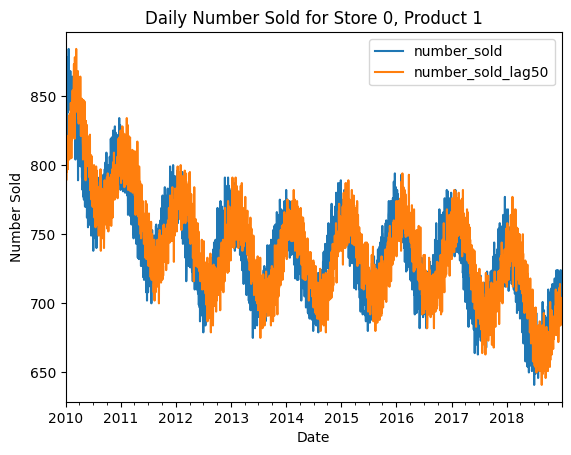

In [50]:
# Daily number of sold items in store 0 product 1
df_filtered = df[(df['store'] == 0) & (df['product'] == 1)]
# Change the tuple to a list to select multiple columns for plotting
df_filtered[['number_sold', 'number_sold_lag50']].plot(title=f'Daily Number Sold for Store 0, Product 1')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.show()

In [51]:
#df[['number_sold', 'number_sold_lag50']].plot()

In [52]:
# df[['Close', 'closed_lag1']].corr()

In [53]:
df.resample('M')['number_sold'].mean()

<ipython-input-53-a1a25715209e>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['number_sold'].mean()


,number_sold
Date,
2010-01-31,782.674194
2010-02-28,780.484694
2010-03-31,778.058986
2010-04-30,776.665714
2010-05-31,776.608295
...,...
2018-08-31,787.972811
2018-09-30,790.802381
2018-10-31,791.428571


# Seasonality

<ipython-input-54-5a2dfc955de6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['number_sold'].resample('M').mean(),


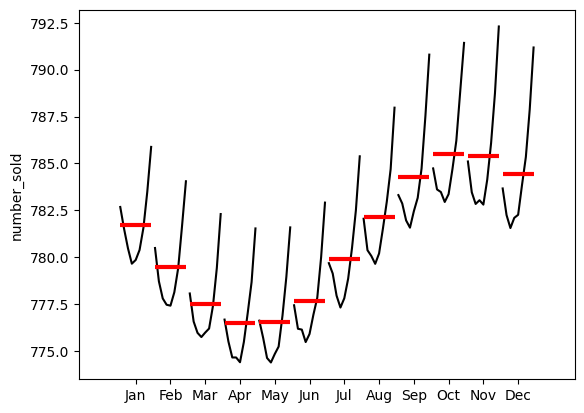

In [54]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of closing values
month_plot(df['number_sold'].resample('M').mean(),
           ylabel = 'number_sold')
plt.show()

<ipython-input-55-93319166ec0a>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['number_sold'].resample('Q').mean(),


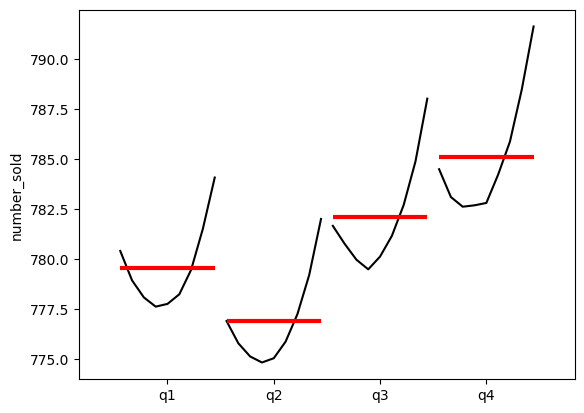

In [55]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['number_sold'].resample('Q').mean(),
           ylabel = 'number_sold')
plt.show()

<ipython-input-56-93319166ec0a>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['number_sold'].resample('Q').mean(),


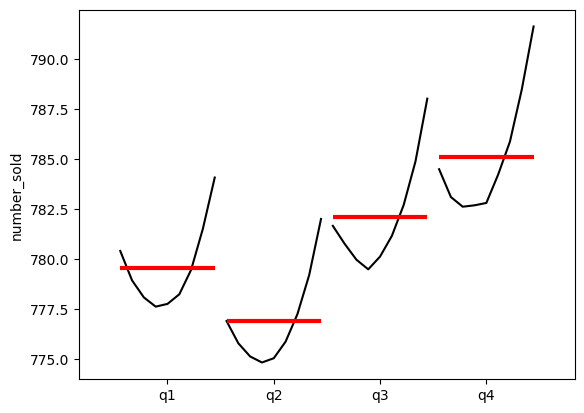

In [56]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['number_sold'].resample('Q').mean(),
           ylabel = 'number_sold')
plt.show()

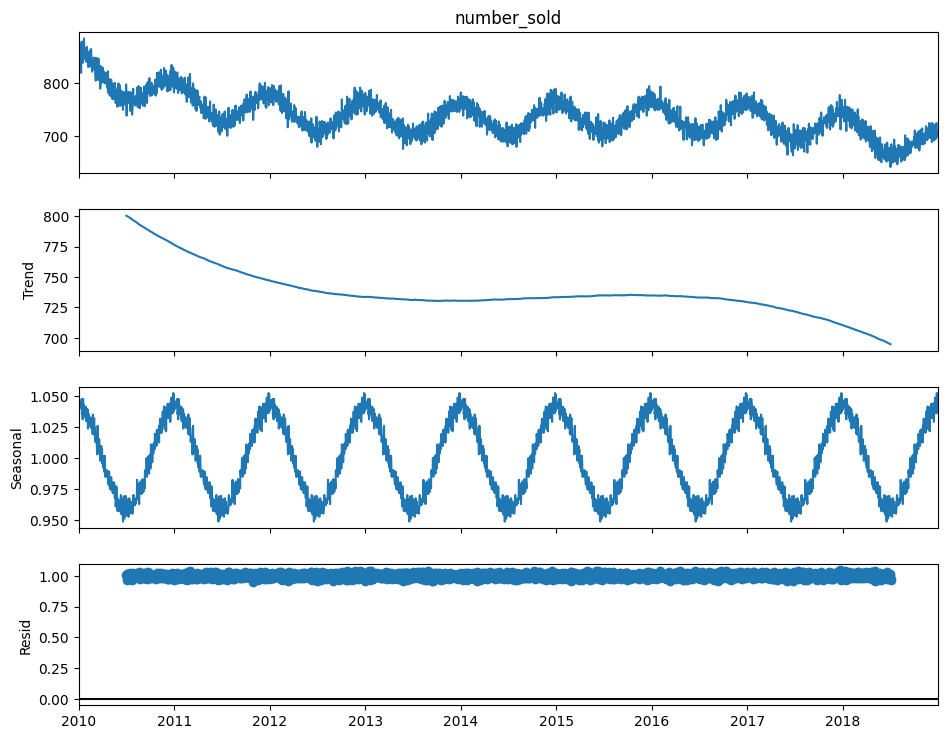

In [57]:
# Seasonal Decomposition Plots for number_sold Data
# Multiplicative model type, and daily (365) period
df_filtered = df[(df['store'] == 0) & (df['product'] == 1)]

decomposition = seasonal_decompose(df_filtered['number_sold'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

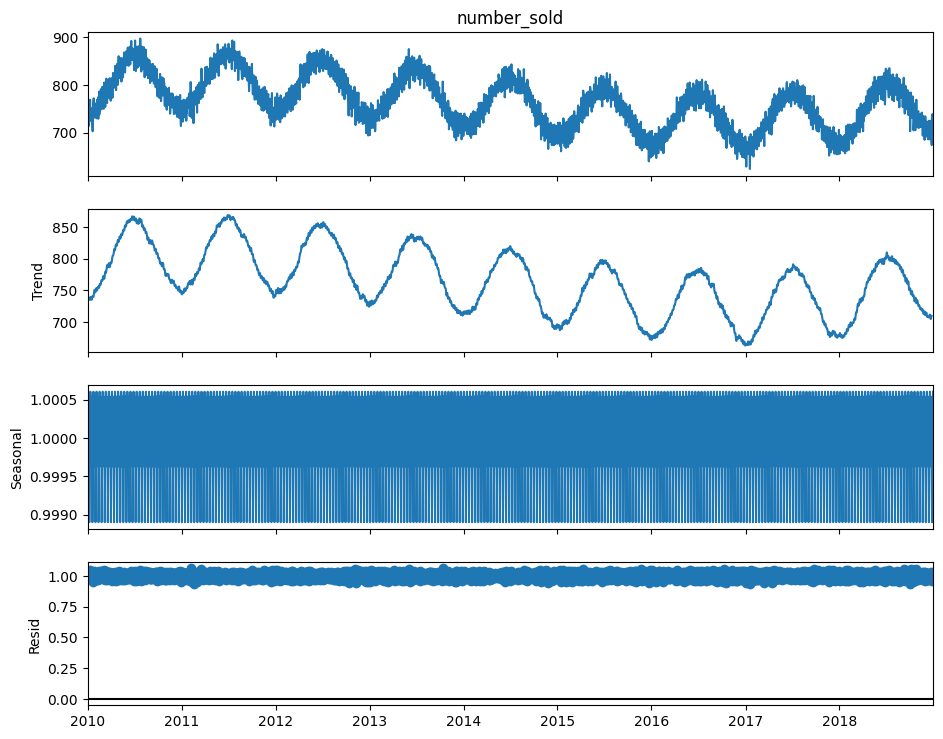

In [58]:
# Multiplicative model type, and monthly (12) period
df_filtered = df[(df['store'] == 1) & (df['product'] == 1)]
decomposition = seasonal_decompose(df_filtered['number_sold'],
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




In [59]:
df.head()

,store,product,number_sold,year,month,day,weekday,weekday_numeric,is_weekend,number_sold_lag1,number_sold_lag2,number_sold_lag50
Date,,,,,,,,,,,,
2010-01-01,0,0,801,2010,1,1,Friday,4,False,NaN,NaN,NaN
2010-01-02,0,0,810,2010,1,2,Saturday,5,True,801.0,NaN,NaN
2010-01-03,0,0,818,2010,1,3,Sunday,6,True,810.0,801.0,NaN
2010-01-04,0,0,796,2010,1,4,Monday,0,False,818.0,810.0,NaN
2010-01-05,0,0,808,2010,1,5,Tuesday,1,False,796.0,818.0,NaN


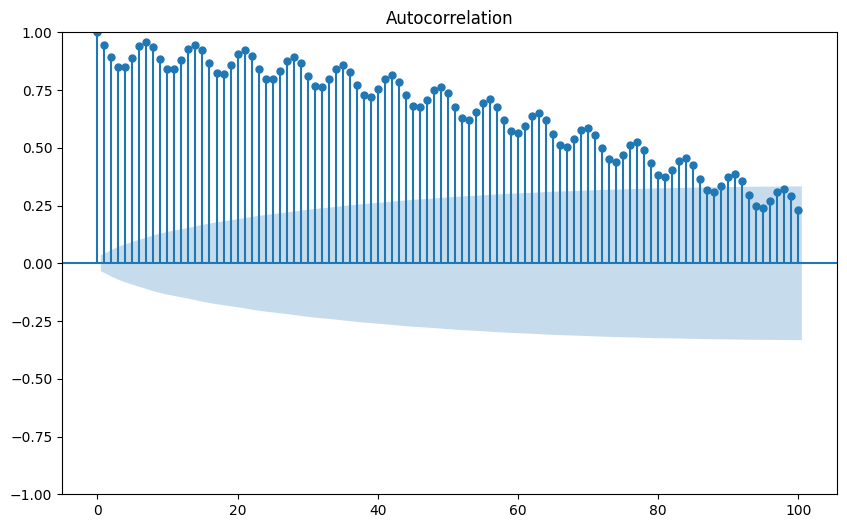

In [60]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_filtered['number_sold'], lags = 100, ax = ax)
plt.show()

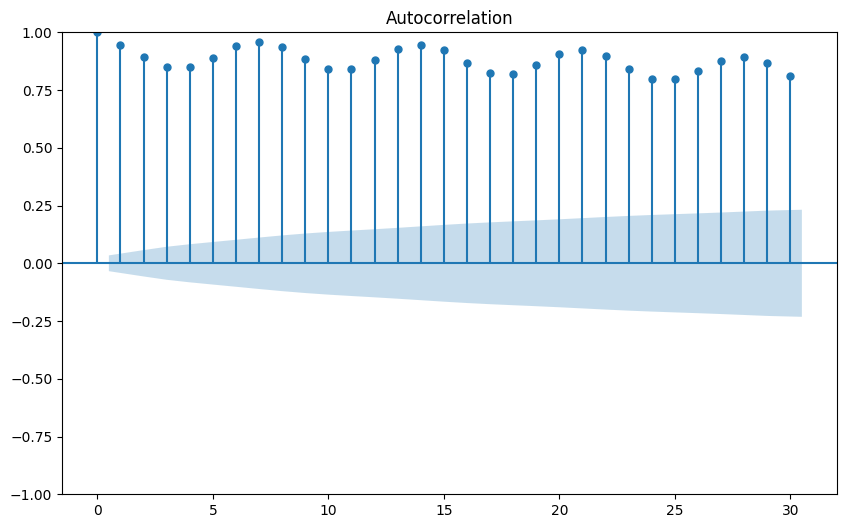

In [61]:
# Plot the autocorrelation (ACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_filtered['number_sold'], lags = 30, ax = ax)
plt.show()

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

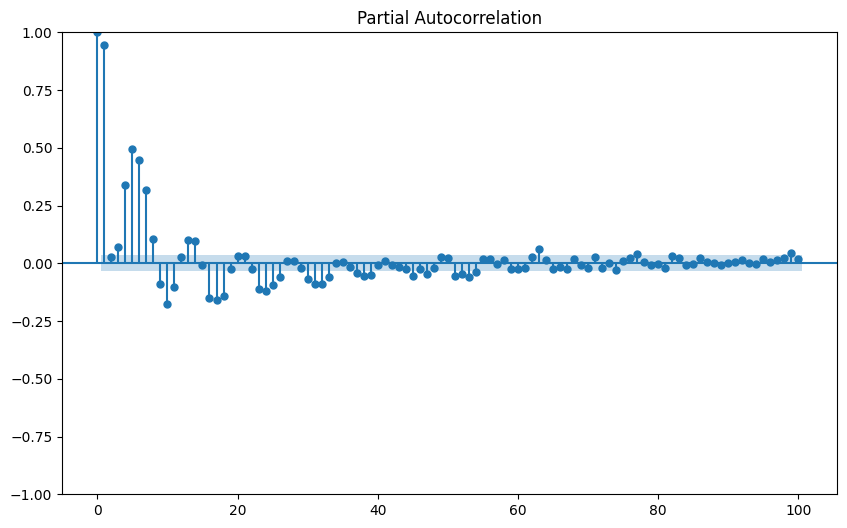

In [62]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df_filtered['number_sold'], lags = 100, ax = ax)
plt.show()

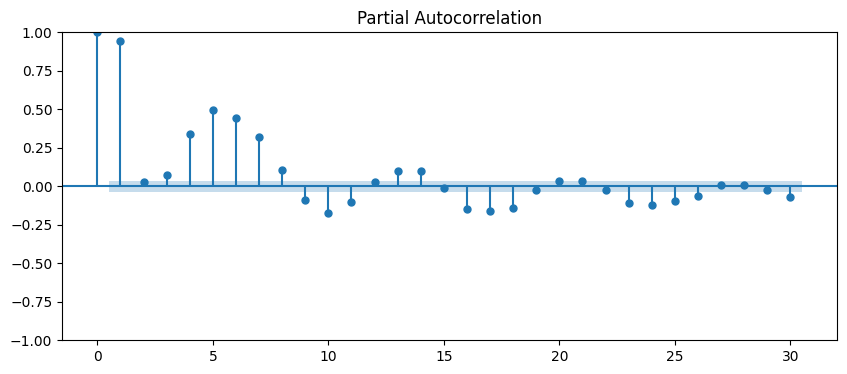

In [63]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df_filtered['number_sold'], lags = 30, ax = ax)
plt.show()

#Training and test

In [112]:
df.index = pd.to_datetime(df.index)

# Select just one time series (e.g. store=2, product=0) for simplicity
subset = df[(df['store'] == 2) & (df['product'] == 0)]

# Extract the 'number_sold' series
y = subset['number_sold']


In [113]:
# Let's say last 30 days as test
periods = 13
train = y.iloc[:-periods]
test = y.iloc[-periods:]

In [116]:
# Create a Simple Exponential Smoothing model using the training data.
model_simple = SimpleExpSmoothing(train).fit()

# Use the fitted model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_simple = model_simple.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


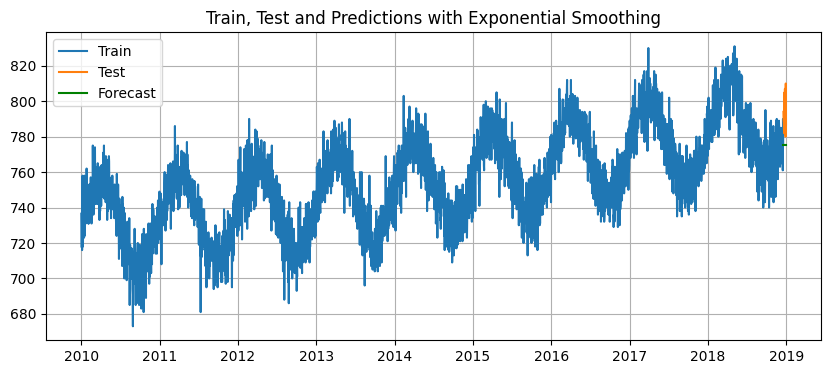

In [118]:
plt.figure(figsize=(10, 4))

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_simple, label='Forecast', color='green')

plt.title("Train, Test and Predictions with Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()


In [121]:
# Double Exponential Smoothing Model
# Initialize and fit an Exponential Smoothing model to the training data
# Use a multiplicative trend component ('mul') and no seasonal component (seasonal=None)

#El model el mafroud yb2a esmo Holt Winters bas el library msamyaah exponential smoothing

model_double = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = None).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [123]:
# Use the fitted Double Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_double = model_double.forecast(len(test))
predictions_double

,0
2018-12-19,777.366385
2018-12-20,777.508022
2018-12-21,777.649684
2018-12-22,777.791372
2018-12-23,777.933086
2018-12-24,778.074826
2018-12-25,778.216592
2018-12-26,778.358383
2018-12-27,778.500201
2018-12-28,778.642044


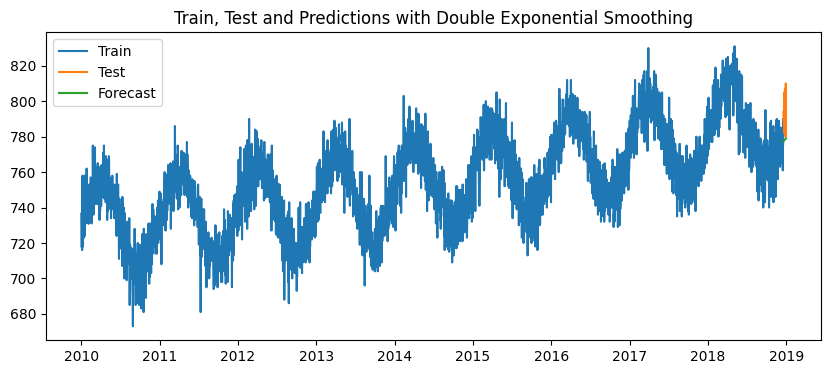

In [124]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_double, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [125]:
# Triple Exponential Smoothing Model
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the training data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 52 (weekly data with yearly seasonality)

model_triple = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 52).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [126]:
# Use the fitted Triple Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_triple = model_triple.forecast(len(test))
predictions_triple

,0
2018-12-19,775.333523
2018-12-20,779.776245
2018-12-21,780.285246
2018-12-22,774.507628
2018-12-23,775.744711
2018-12-24,777.506884
2018-12-25,775.982949
2018-12-26,775.365912
2018-12-27,774.964812
2018-12-28,776.487775


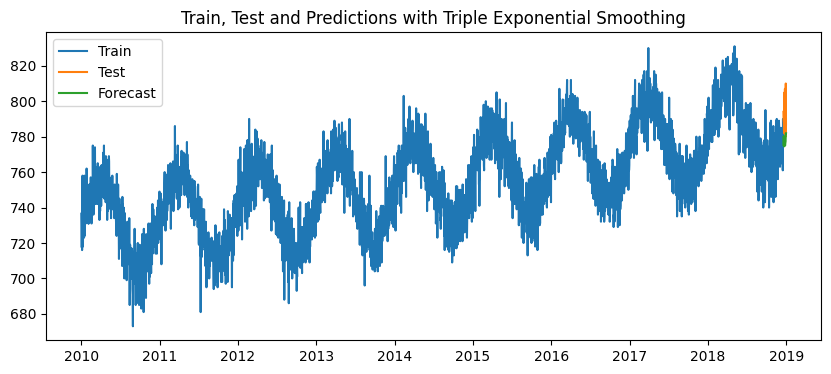

In [127]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_triple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [128]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions_triple)
rmse = sqrt(mean_squared_error(test, predictions_triple))
mape = mean_absolute_percentage_error(test, predictions_triple)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 15.76
The RMSE is 18.38
The MAPE is 1.97 %


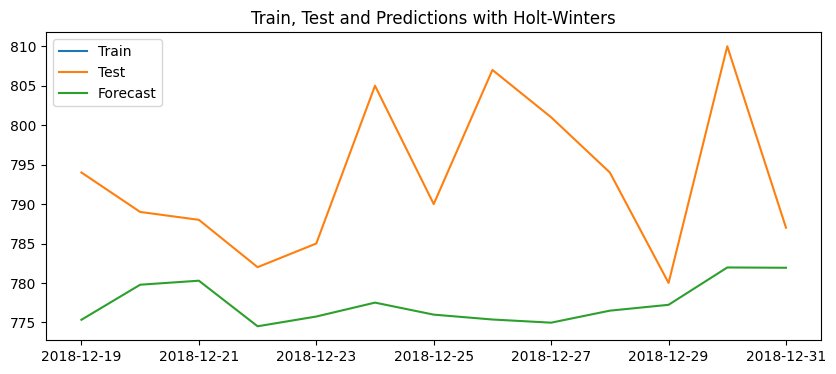

The MAE is 15.76
The RMSE is 18.38
The MAPE is 1.97 %


In [129]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = sqrt(mean_squared_error(test, predictions))
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Call the model_assessment function with the specified arguments
model_assessment(train['2022-06':], test, predictions_triple, "Holt-Winters")

In [132]:
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the whole data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 52 (weekly data with yearly seasonality)
model = ExponentialSmoothing(subset['number_sold'], # Corrected column name
                             trend = 'add',
                             seasonal = "mul",
                             seasonal_periods = 52).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [133]:
 # Predict the values for the next 13 weeks
forecast = model.forecast(13)
forecast

,0
2019-01-01,792.641980
2019-01-02,794.048444
2019-01-03,796.666259
2019-01-04,795.098048
2019-01-05,795.530355
2019-01-06,796.311640
2019-01-07,795.441104
2019-01-08,799.092239
2019-01-09,799.390562
2019-01-10,796.918102


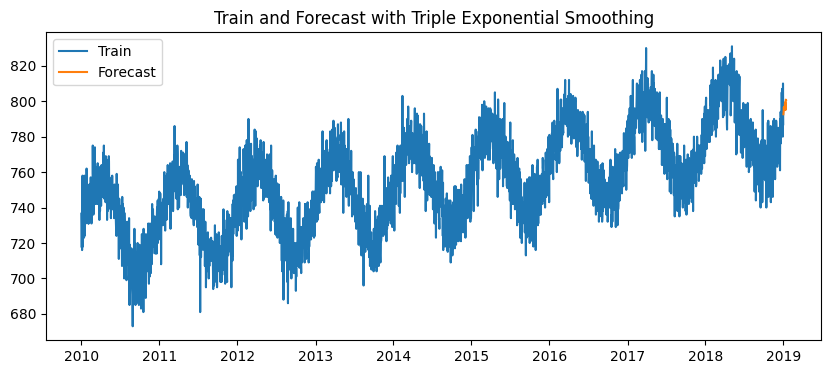

In [137]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train and forecast values
plt.plot(subset['number_sold'], label = 'Train')
plt.plot(forecast, label = "Forecast")

# Add title and legend to the plot
plt.title("Train and Forecast with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [138]:
# Function to plot the train and forecast values
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot train and forecast values
  plt.plot(df.complaints, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # Add title and legend to the plot
  plt.title("Train and Forecast with Triple Exponential Smoothing")
  plt.legend()
  plt.show()